In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
importlib.reload(kgs)
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()


vast
vast
init CUDA
Detected GPU compute capability: 12.0 (arch=sm_120)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_120 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /packing/temp/pack_cuda_saved.cu -o /packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_120'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers
ptxas info    : Compile time = 14.473 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_120'
ptxas info    : Function properties for multi_boundary_list_total
    224

In [2]:
%load_ext pyinstrument

In [9]:

import pack_ga3
import time
import pack_runner
runner = pack_runner.baseline_runner()
runner.base_ga.ga.do_legalize = False
runner.base_ga.ga.ga_base.do_legalize = False
runner.base_ga.ga.ga_base.N_trees_to_do = 40
runner.base_ga.n_generations = 5


Processing class: BaseClass
  Added method: BaseClass.__init__
  Added method: BaseClass._check_constraints
  Added method: BaseClass._check_types
  Added method: BaseClass.check_constraints
Processing class: SolutionCollection
  Added method: SolutionCollection.__init__
  Added method: SolutionCollection._check_constraints
  Added method: SolutionCollection._check_types
  Added method: SolutionCollection.check_constraints
  Added method: SolutionCollection.create_clone
  Added method: SolutionCollection.create_clone_batch
  Added method: SolutionCollection.create_empty
  Added method: SolutionCollection.get_crystal_axes
  Added method: SolutionCollection.get_crystal_axes_allocate
  Added method: SolutionCollection.merge
  Added method: SolutionCollection.rotate
  Added method: SolutionCollection.select_ids
Processing class: SolutionCollectionLattice
  Added method: SolutionCollectionLattice.__init__
  Added method: SolutionCollectionLattice._check_constraints
  Added method: SolutionC

_     ._   __/__   _ _  _  _ _/_   Recorded: 07:41:28  Samples:  14540
 /_//_/// /_\ / //_// / //_'/ //     Duration: 31.275    CPU time: 30.595
/   _/                      v5.1.1

Cell [11]

31.274 <module>  /tmp/ipykernel_2279/3647973873.py:1
`- 31.261 Runner.run  pack_runner.py:29
   `- 31.208 Orchestrator.run  pack_ga3.py:1321
      |- 25.827 GAMultiRing.apply_selection  pack_ga3.py:373
      |  `- 25.827 GAMultiRing._apply_selection  pack_ga3.py:552
      |     `- 25.827 GASinglePopulationOld.apply_selection  pack_ga3.py:373
      |        `- 25.826 GASinglePopulationOld._apply_selection  pack_ga3.py:998
      |           |- 25.133 compute_genetic_diversity  kaggle_support.py:1218
      |           |  `- 25.094 compute_genetic_diversity_matrix  kaggle_support.py:1071
      |           |     `- 25.059 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
      |           |        |- 17.930 Device.synchronize  <built-in>
      |           |        |- 6.101 [self]  kaggle_support.py
      |           |        `- 0.371 amin  cupy/_statistics/order.py:10
      |           |           `- 0.342 ndarray.min  <built-in>
      |           `- 0.347 compute_genetic_diversity_matrix  kaggle_support.py:1071
      |              `- 0.347 compute_genetic_diversity_matrix_shortcut  kaggle_support.py:959
      |- 2.360 Orchestrator._relax  pack_ga3.py:1277
      |  `- 2.277 run_simulation_list  pack_dynamics.py:633
      |     `- 2.273 OptimizerBFGS.run_simulation  pack_dynamics.py:42
      |        `- 2.268 lbfgs  lbfgs_torch_parallel.py:382
      |           |- 1.577 [self]  lbfgs_torch_parallel.py
      |           `- 0.598 f_torch  pack_dynamics.py:68
      |              `- 0.442 Device.synchronize  <built-in>
      |- 1.947 GAMultiRing.generate_offspring  pack_ga3.py:332
      |  `- 1.947 GAMultiRing._generate_offspring  pack_ga3.py:621
      |     `- 1.930 GASinglePopulationOld.generate_offspring  pack_ga3.py:332
      |        `- 1.762 GASinglePopulationOld._generate_offspring  pack_ga3.py:1111
      |           `- 1.606 MoveSelector.do_move_vec  pack_move.py:42
      |              `- 1.604 MoveSelector._do_move_vec  pack_move.py:83
      |                 |- 0.941 Crossover.do_move_vec  pack_move.py:42
      |                 `- 0.611 [self]  pack_move.py
      |- 0.459 GAMultiRing.score  pack_ga3.py:288
      |  `- 0.459 GAMultiRing._score  pack_ga3.py:478
      |     `- 0.459 GASinglePopulationOld.score  pack_ga3.py:288
      |        `- 0.459 GASinglePopulationOld._score  pack_ga3.py:733
      `- 0.457 GAMultiRing.reset  pack_ga3.py:283
         `- 0.457 GAMultiRing._reset  pack_ga3.py:475
            `- 0.457 GASinglePopulationOld.reset  pack_ga3.py:283
               `- 0.457 GASinglePopulationOld._reset  pack_ga3.py:720
                  `- 0.319 InitializerRandomJiggled.initialize_population  pack_ga3.py:178
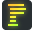

In [10]:
%%pyinstrument
kgs.profiling=True
kgs.enable_module_profiling(kgs)
t = time.time()
runner.run()
print("Elapsed time:", time.time() - t)


In [11]:
kgs.print_module_profile()


Timer unit: 1e-09 s

Total time: 0 s
File: /packing/code/analysis/../core/kaggle_support.py
Function: assert_mps at line 43

Line #      Hits         Time  Per Hit   % Time  Line Contents
    43                                           def assert_mps():
    44                                               import subprocess
    45                                               out = subprocess.run(
    46                                                   ["bash", "-lc", "pgrep -f -x nvidia-cuda-mps-server"],
    47                                                   stdout=subprocess.PIPE,
    48                                               )
    49                                               if out.returncode != 0:
    50                                                   print("WARNING: CUDA MPS not active")
    51                                                   #if env=='vast':
    52                                                   #    raise Exception('no MPS')

Total time: 0 s
